In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#read dataset
comments=pd.read_csv('E:\Youtube Analytics\GBcomments.csv',error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [5]:
comments.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


#### sentiment analysis of youtube_comments

In [9]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [10]:
from textblob import TextBlob

In [11]:
TextBlob('Its more accurate to call it the M+ (1000) be..').sentiment.polarity

0.45000000000000007

In [12]:
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [13]:
comments.dropna(inplace=True)

In [14]:
polarity=[] # list which will contain the polarity of the comments

for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [15]:
comments['polarity']=polarity

In [16]:
comments.head(20)

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.450000
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.000000
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.000000
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.000000
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.000000
5,jt2OHQh0HoQ,Keep calm and buy iphone 8 Keep calm and buy i...,0,0,0.300000
6,jt2OHQh0HoQ,i am a big fan of youtube and u !!!!!!!!!!!!!,0,0,0.000000
7,jt2OHQh0HoQ,You will never find Losers who line up and pay...,0,0,-0.100000
8,jt2OHQh0HoQ,*APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...,0,0,0.028571
9,jt2OHQh0HoQ,"I'm only here to see Emma, I love her so much!...",0,0,0.500000


#### Lets perform EDA for the Positve sentences

In [17]:
comments_positive=comments[comments['polarity']==1]

In [18]:
comments_positive.shape

(20400, 5)

In [19]:
comments_positive.head()

,video_id,comment_text,likes,replies,polarity
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.0
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0,2,1.0
80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0,1,1.0
158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0,0,1.0
175,YPVcg45W0z4,Welcome to the Scandiworld!,0,0,1.0


In [20]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [21]:
from wordcloud import WordCloud,STOPWORDS

In [22]:
stopwords=set(STOPWORDS)

In [23]:
total_comments=' '.join(comments_positive['comment_text'])

In [24]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

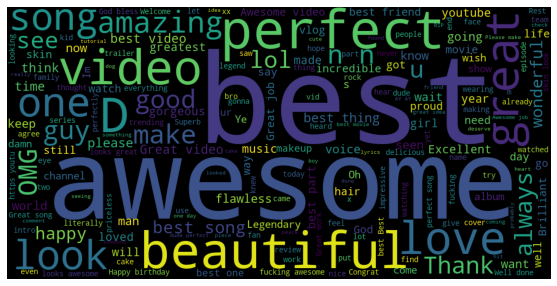

In [25]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

#### Its time to go for negative sentences

In [26]:
comments_negative=comments[comments['polarity']==-1]

In [27]:
total_comments=' '.join(comments_negative['comment_text'])

In [28]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

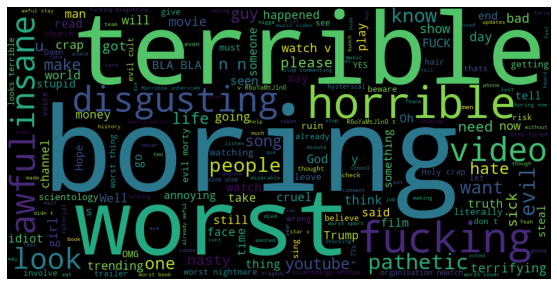

In [29]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

### Analysing Tags column,what are trending tags on youtube

In [32]:
videos=pd.read_csv('E:\Youtube Analytics\USvideos.csv',error_bad_lines=False)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 20-21: truncated \UXXXXXXXX escape (<ipython-input-32-a58c1305a08c>, line 1)

In [31]:
videos.head()

NameError: name 'videos' is not defined

In [ ]:
tags_complete=' '.join(videos['tags'])

In [ ]:
tags_complete

In [ ]:
import re

In [ ]:
tags=re.sub('[^a-zA-Z]',' ',tags_complete)

In [ ]:
tags

In [ ]:
tags=re.sub(' +',' ',tags)

In [ ]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)

In [ ]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

#### Lets find out the relation among continuous variables
#### As quite obvious the number of likes have very strong relation with views

In [ ]:
sns.regplot(data=videos,x='views',y='likes')
plt.title('Regression plot for views & likes')

#### dislikes vs views Analysis

In [ ]:
sns.regplot(data=videos,x='views',y='dislikes')
plt.title('Regression plot for views & dislikes')

#### Correlation matrix is the evidence of above analysis!

In [ ]:
df_corr=videos[['views','likes','dislikes']]

In [ ]:
df_corr.corr()

In [ ]:
sns.heatmap(df_corr.corr(),annot=True)

### Analyse Emojis in comments

In [ ]:
comments.head()

In [ ]:
comments['comment_text'][1]

    Every emoji has a Unicode associated with it
     '\U0001F600' is a unicode for 😀

In [ ]:
print('\U0001F600')

In [ ]:
!pip install emoji

In [ ]:
import emoji

In [ ]:
len(comments)

In [ ]:
comment=comments['comment_text'][1]

In [ ]:
[c for c in comment if c in emoji.UNICODE_EMOJI]

In [ ]:
str=''
for i in comments['comment_text']:
    list=[c for c in i if c in emoji.UNICODE_EMOJI]
    for ele in list:
        str=str+ele

In [ ]:
len(str)

In [ ]:
str

    lets create a dictionary of having each emoji with its frequency as well

In [ ]:
result={}
for i in set(str):
    result[i]=str.count(i)

In [ ]:
result

    sort the emojis according to its count or frequency

In [ ]:
result.items()

In [ ]:
final={}
for key,value in sorted(result.items(),key =lambda item:item[1]):
    final[key]=value

In [ ]:
final

In [ ]:
## convert dictionary into list for this we have to unzip this dictionary
keys=[*final.keys()]

In [ ]:
keys

In [ ]:
values=[*final.values()]

In [ ]:
values

In [ ]:
df=pd.DataFrame({'chars':keys[-20:],'num':values[-20:]})

In [ ]:
df

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [ ]:
trace=go.Bar(
x=df['chars'],
y=df['num']
)

iplot([trace])